#Campus Recruitment Prediction With Machine Learning for MBA Students


 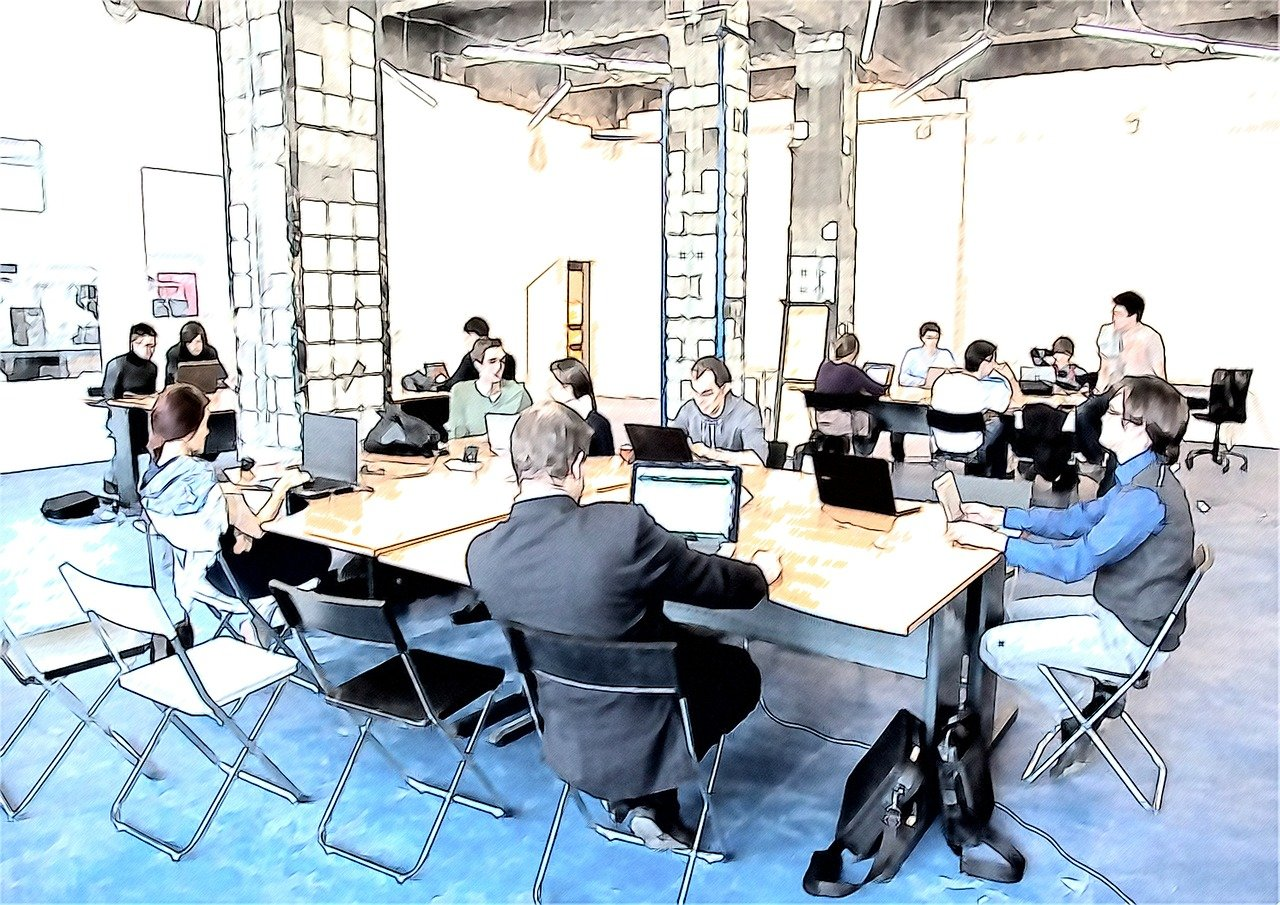

**Student Name:** ARALUGASWATHTHA S.V.C.R.P<br> 
**Registration Number:** EG/2020/3827<br> 

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [1]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
import missingno as msno;

## Data Loading

In [2]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here

df = pd.read_csv("Placement_Data_Full_Class.csv")

# Print the first five rows of the loaded dataframe

# Your code goes here
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop('sl_no', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [4]:
# Identify the shape of the loaded dataframe

# Your code goes here
df.shape

(215, 14)

In [5]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**
Categorical Features:

1. gender
2. sc_b (Board of Education for Secondary Education)
3. hsc_b (Board of Education for Higher Secondary Education)
4. hsc_s (Specialization in Higher Secondary Education)
5. degree_t (Under Graduation Degree type)
6. workex (Work Experience)
7. specialisation
8. status (Placement Status)

Numerical Features:

1. ssc_p (Secondary Education percentage - 10th Grade)
2. hsc_p (Higher Secondary Education percentage - 12th Grade)
3. degree_p (Degree Percentage)
4. etest_p (Employability test percentage)
5. mba_p (MBA percentage)
6. salary (Salary offered by corporations)

In [6]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here

df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**We're splitting the dataset into two parts: the train set and the test set. We'll use the train set for our visualizations. Why? Well, this helps us keep things fair when we're evaluating our models later. Visualizing the train set helps us understand the data better and make smart choices about which features to use and what kind of model to build. Plus, by only looking at the train set, we avoid accidentally using information from the test set to guide our decisions. That way, when we finally test our model on the test set, we can be confident that it's truly ready for the real world.

In [7]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
x = df.drop('status', axis=1)  
y = df['status']  # Dependent variable

# Split the dataset into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [8]:
# Print number of training data points

# Your code goes here

print(len(x_train))


172


In [9]:
# Print number of testing data points

# Your code goes here
print(len(x_test))

43


Text(0.5, 1.0, 'Distribution of Placement Status in Training Set')

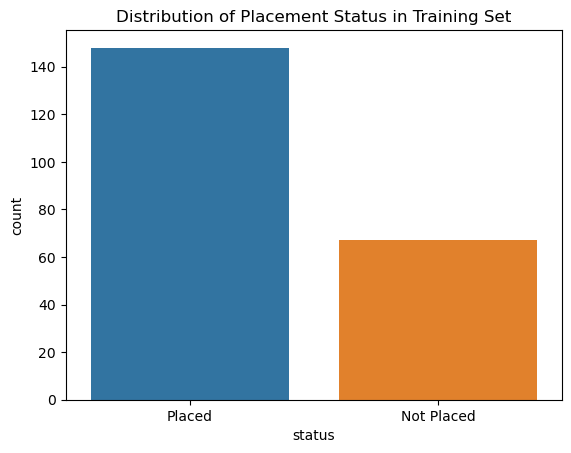

In [10]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

sns.countplot(x='status', data=df)
plt.title('Distribution of Placement Status in Training Set')


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** Yes<br> 
1. Biased Predictions: Models may favor the majority class, leading to inaccurate predictions for minority classes. <br>
2. Poor Generalization: Models trained on imbalanced data may struggle to generalize to new, unseen data, especially for minority classes.<br>
3. Misleading Evaluation: Traditional evaluation metrics like accuracy can be misleading, as they don't account for class imbalance and can give a false sense of model performance.<br>



Text(0.5, 1.0, 'Recruitment Status Based on Gender (Training Set)')

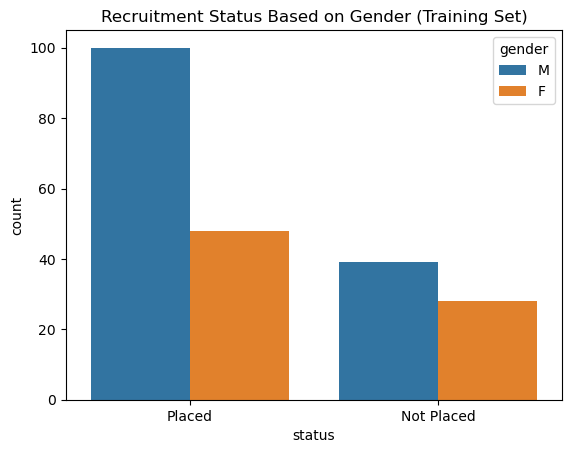

In [11]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

sns.countplot(df , x="status" , hue="gender")
plt.title('Recruitment Status Based on Gender (Training Set)')

**Q:** Explain the observation from the above table.
> **A:**
1. The data reveals a notable contrast in job placement rates between men and women. Specifically, around 67% of males secured jobs compared to 57% of females. This discrepancy highlights a significant difference in opportunities afforded to individuals based on their gender.
2. Despite the gap in placement rates, both genders exhibit similar representation in the "not placed" category, indicating that while challenges exist for all, females are disproportionately affected in terms of placement rates. This suggests the need for closer examination of factors influencing job placements within machine learning roles.


Text(0.5, 1.0, 'Recruitment Status based on Postgraduate Specialization')

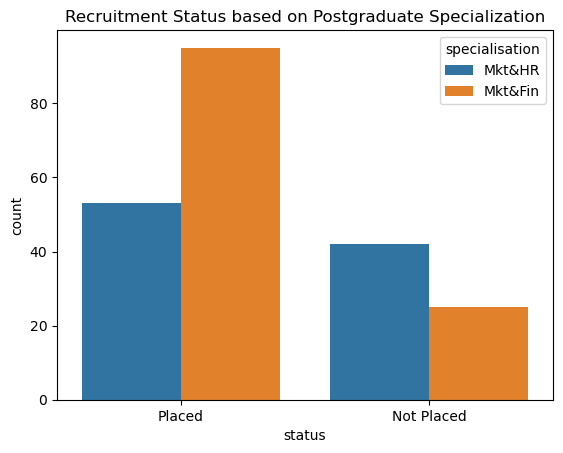

In [12]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here

sns.countplot(df , x="status", hue="specialisation")
plt.title('Recruitment Status based on Postgraduate Specialization')

**Q:** Inteprete the above results.
> **A:**
The graph illustrates variations in placement rates across different specializations, particularly noting a higher placement rate for individuals with a specialization in Marketing and HR (Mkt&HR). However, it's essential to recognize that placement outcomes are influenced by a multitude of factors beyond specialization alone. These factors may include academic performance, work experience, interview performance, job availability, and employer preferences. Therefore, while the graph provides valuable insights, further analysis is warranted to fully understand the broader context and identify the underlying factors influencing placement outcomes. Drawing definitive conclusions about placement dynamics requires a comprehensive examination of these factors within the dataset.

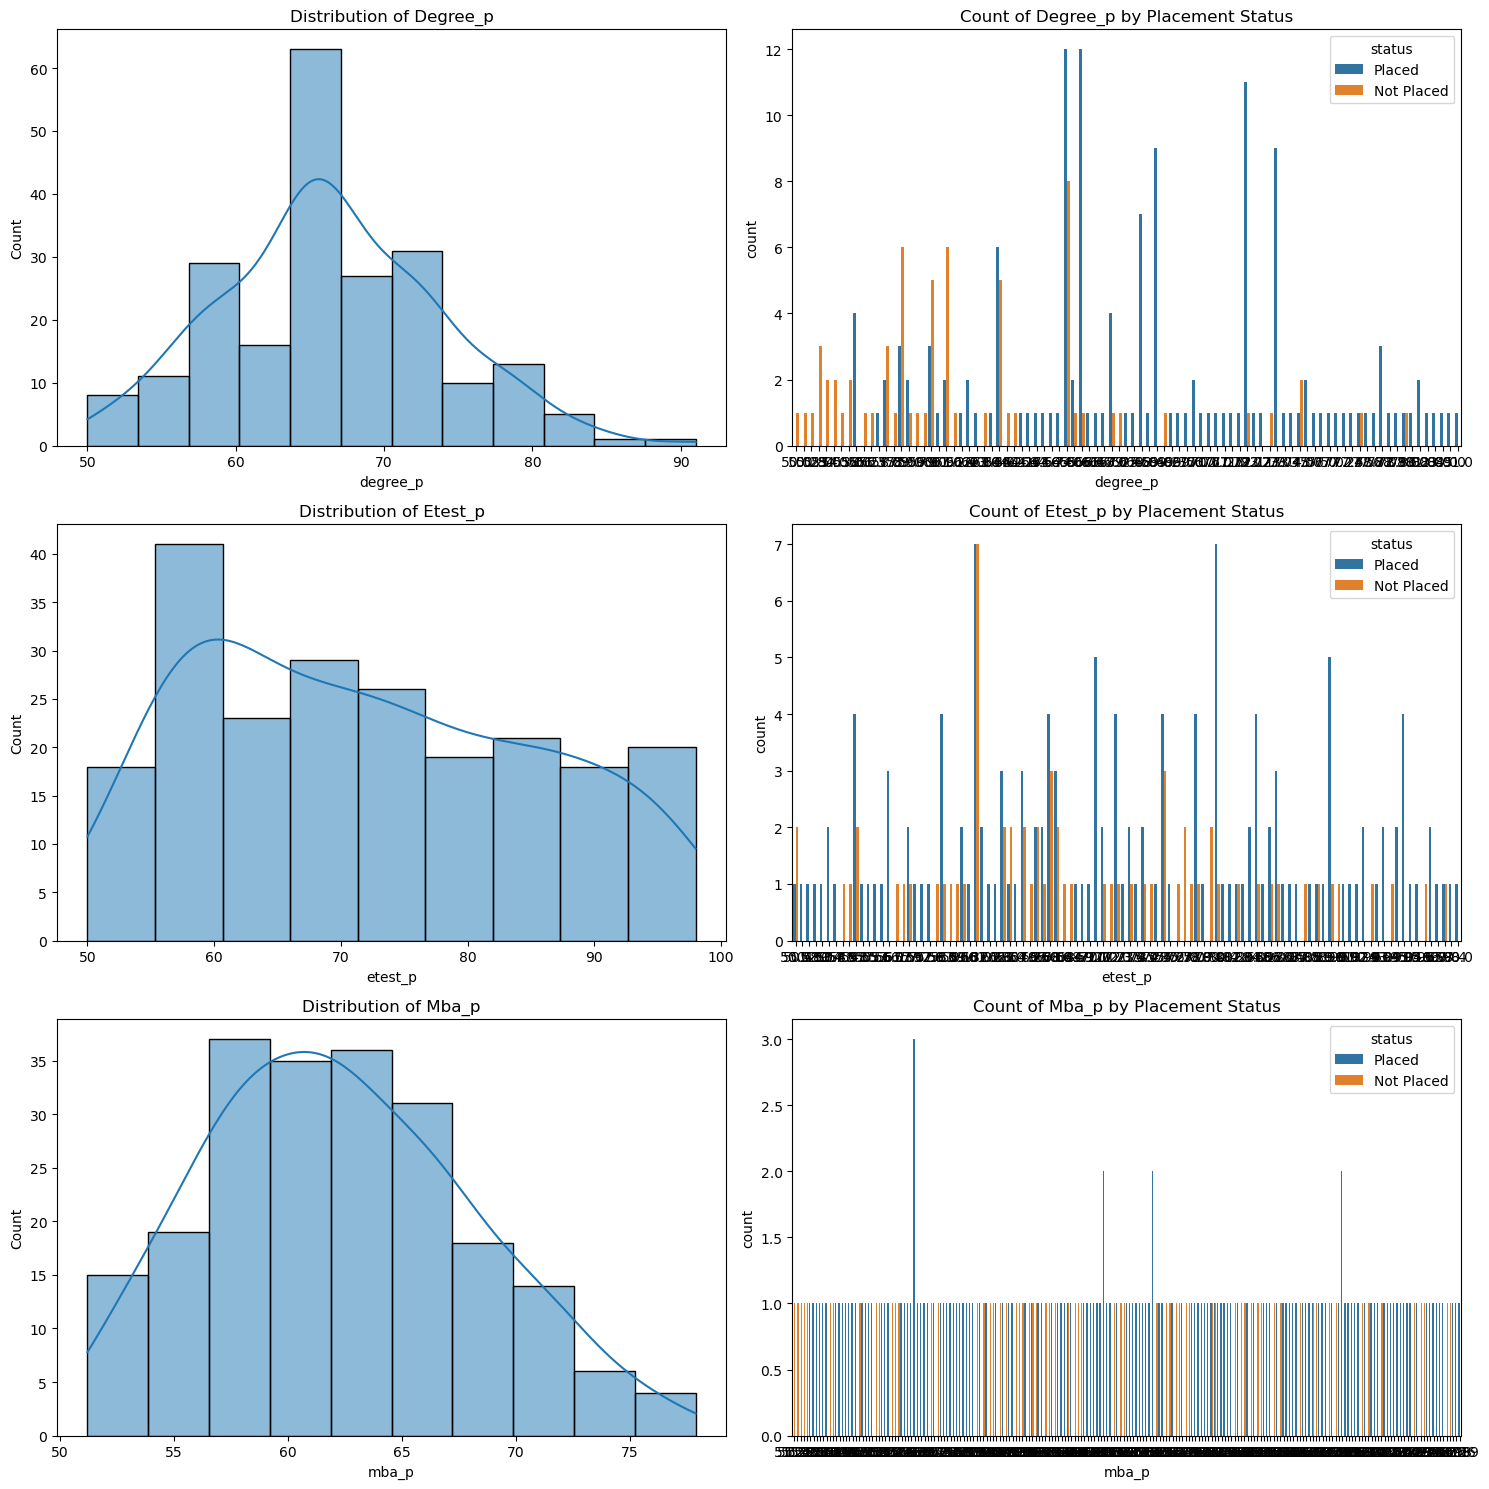

In [13]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot histograms for degree percentage, employability test percentage, and MBA percentage
columns = ['degree_p', 'etest_p', 'mba_p']
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column.capitalize()}')

# Plot countplots for each variable based on placement status
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue='status', ax=axes[i, 1])
    axes[i, 1].set_title(f'Count of {column.capitalize()} by Placement Status')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()     


**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**

The six charts seem to represent the distribution of three variables: degree %, employability test percentage, and MBA percentage. There are also two plots for each variable, one for the whole data set and one for the data separated by placement status. <br>

Distribution of degree percentage:
The general distribution is tilted to the right, with a higher number of persons holding lesser degrees.
Placed students have a greater degree percentage than other students, as shown by the distribution shift to the right. <br>

Distribution of Employability Test Percentage:
The overall distribution is generally typical, with the majority of participants scoring in the center of the exam.
The distribution of placed and non-placed students differs somewhat, although not significantly. <br>

Distribution of MBA Percentage:
The general distribution is tilted to the left, with more persons holding lower MBA percentages. The distribution for placed students is also pushed to the right when compared to the distribution for all students, showing that placed students have greater MBA percentages.<br>

Overall, these graphs indicate a good association between degree %, MBA percentage, and placement status. Students with higher degrees and MBAs have a better chance of being placed than those with lesser degrees and MBAs. However, it is crucial to emphasize that these are just correlations and do not imply that obtaining a higher degree or an MBA would ensure you a job. Many additional criteria might influence your chances of being placed, including your job experience, talents, and network.

In [14]:
# Check for the null values in train set

# Your code goes here
x_train.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            50
dtype: int64

In [15]:
# Check for the null values in test set

# Your code goes here
x_test.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            17
dtype: int64

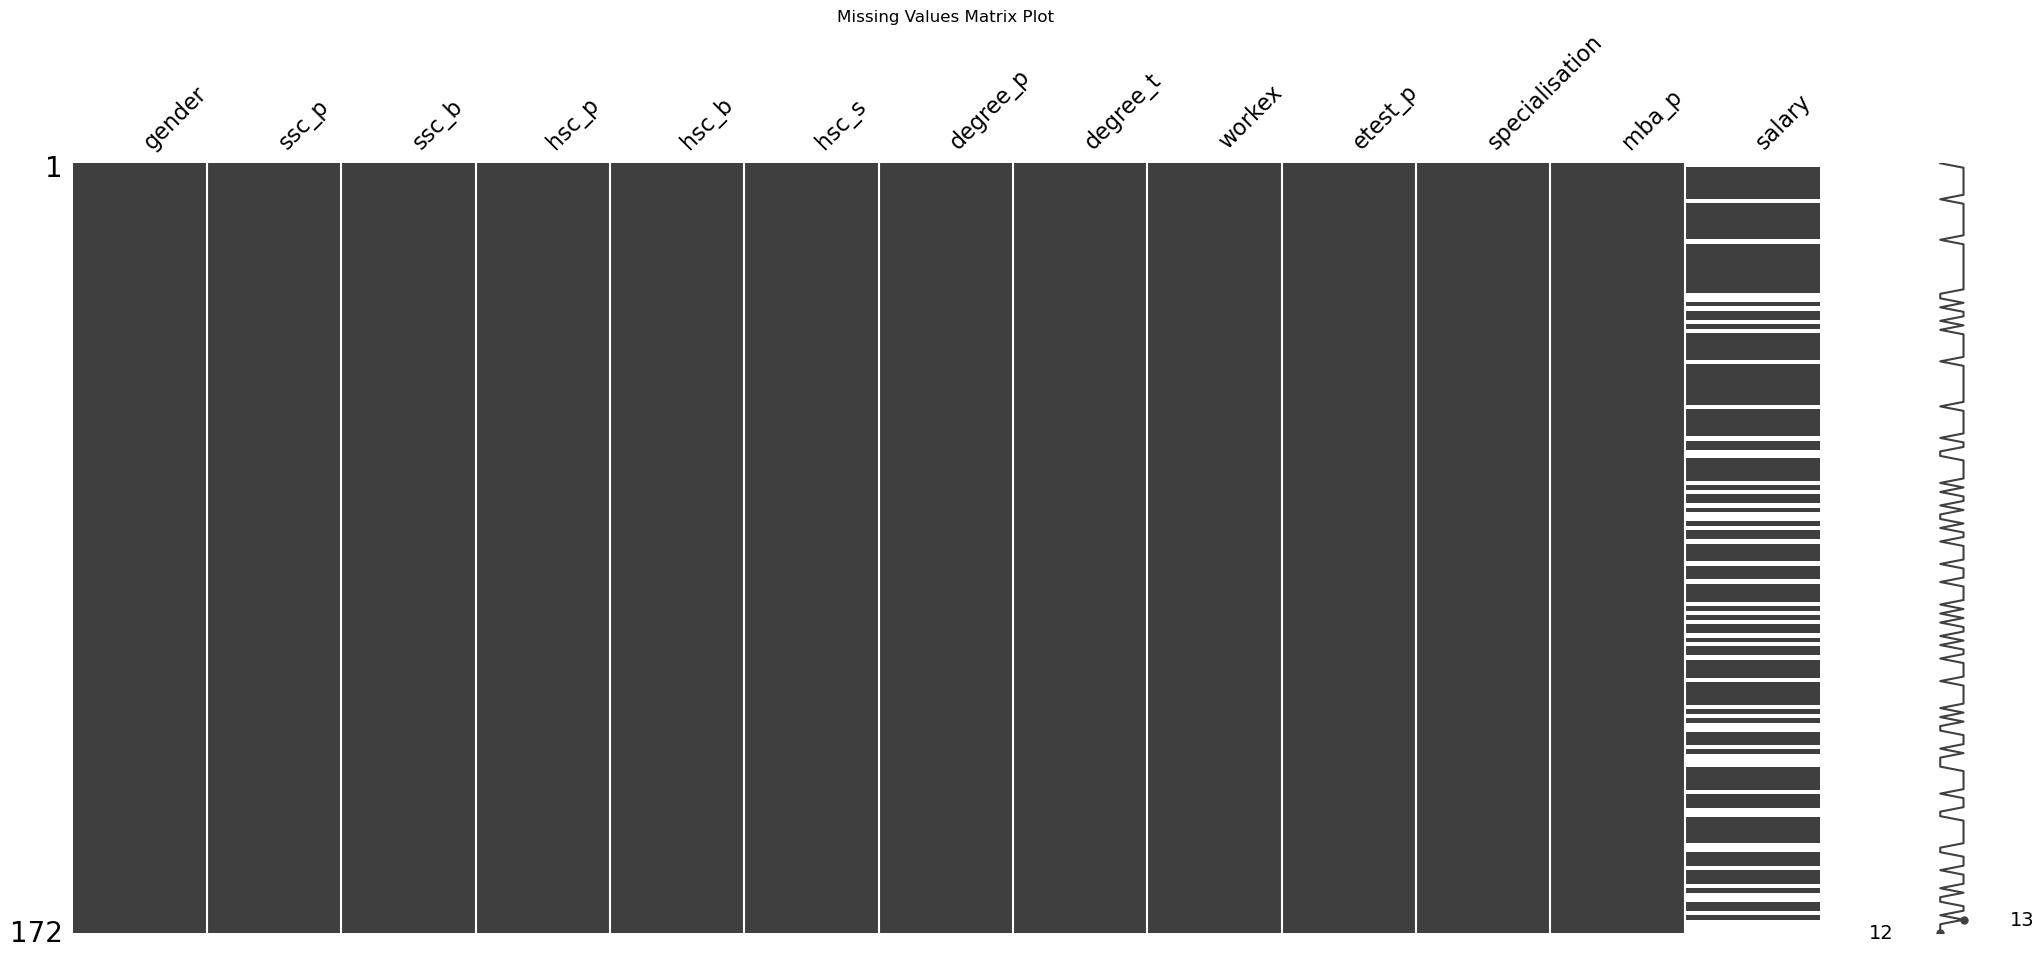

In [16]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
msno.matrix(x_train)
plt.title('Missing Values Matrix Plot')
plt.show()

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**
Defense of Proposed Method:

Preserves Dataset Integrity: Imputing missing 'salary' values with the mean ensures that the dataset remains intact, retaining all observations and variables.

Relevance to Prediction Task: The method maintains relevance to the prediction task by ensuring that information related to placement status (salary) is retained in the dataset, allowing predictive models to effectively learn patterns and relationships.

Utilization of Available Information: Mean imputation utilizes the available information in the dataset to estimate missing values, rather than discarding them entirely. This maximizes the amount of information used for modeling.

Bias Minimization: Mean imputation minimizes bias by replacing missing values with a value that is representative of the distribution of observed values. This helps prevent distortions in the dataset that could affect the performance of predictive models.

In [17]:
# Handle the missing data

# Your code goes here
x_train['salary'].fillna(value=x_train['salary'].mean() , inplace=True);

In [18]:
# Test the training dataset after processing the null values

# Your code goes here
x_train.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [19]:
# Process the null values in the test set

# Your code goes here
x_test['salary'].fillna(value=x_test['salary'].mean() , inplace=True);

In [20]:
# Test the testing dataset after processing the null values

# Your code goes here
x_test.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**

>**Label Encoding Selection**: I've chosen Label Encoding from Scikit-Learn's LabelEncoder to handle categorical features.

>Ordinal Relationship Preservation: Label Encoding assigns unique integers to categories while preserving ordinal relationships, crucial for features like 'gender' and 'ssc_b'.

>Identification of Categorical Features: I identified categorical features using Pandas' select_dtypes function.

>Initialization of LabelEncoder: For each categorical feature, I initialized a LabelEncoder to transform the feature's values into encoded integers.

>Encoding Training and Testing Data: Using the initialized LabelEncoder, I encoded both training and testing data to maintain consistency.

>Encoding the Target Variable: The target variable 'status' was also encoded using Label Encoding to prepare it for modeling.

>Simplicity and Compatibility: Label Encoding is chosen for its simplicity and compatibility with various machine learning algorithms, making it suitable for predictive modeling.

In [21]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.compose import make_column_transformer

# List the categorical features

# Your code goes here
categorical_features = x_train.select_dtypes(include=['object']).columns

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
from sklearn.preprocessing import  LabelEncoder

# Encode the training features

# Your code goes here
for feature in categorical_features:
     encoder = LabelEncoder()
     x_train[feature] = encoder.fit_transform(x_train[feature])


In [22]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 214 to 99
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          172 non-null    int32  
 1   ssc_p           172 non-null    float64
 2   ssc_b           172 non-null    int32  
 3   hsc_p           172 non-null    float64
 4   hsc_b           172 non-null    int32  
 5   hsc_s           172 non-null    int32  
 6   degree_p        172 non-null    float64
 7   degree_t        172 non-null    int32  
 8   workex          172 non-null    int32  
 9   etest_p         172 non-null    float64
 10  specialisation  172 non-null    int32  
 11  mba_p           172 non-null    float64
 12  salary          172 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 14.1 KB


In [23]:
# Encode the testing features

# Your code goes here
for feature in categorical_features:
     encoder = LabelEncoder()
     x_test[feature] = encoder.fit_transform(x_test[feature])

In [24]:
# Encode the target variable in train and test sets

# Your code goes here

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [25]:
# Print the encoded labels for the training set

# Your code goes here
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

### Scale the Numerical Features

In [26]:
# Standard Scale the numerical features

from sklearn.preprocessing import  StandardScaler

encoder = StandardScaler()
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [27]:
# Display the head of the scaled training set
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.731925,-0.531232,-0.921663,-0.782447,0.789076,1.049474,-1.939841,-0.697644,-0.731925,1.225726,1.150793,-0.368022,8.910193e-16
1,0.731925,1.234587,1.084995,0.143864,0.789076,1.049474,-0.405530,1.504094,-0.731925,1.514977,-0.868966,0.034165,1.957490e+00
2,0.731925,0.212271,-0.921663,-0.319292,0.789076,1.049474,0.431367,1.504094,1.366260,-1.232907,-0.868966,-0.062085,2.583470e-01
3,-1.366260,0.955774,-0.921663,0.977543,0.789076,-0.637531,1.826195,-0.697644,-0.731925,-0.871343,-0.868966,0.749164,5.934830e-02
4,0.731925,1.327525,1.084995,2.181746,0.789076,-0.637531,2.244644,-0.697644,-0.731925,0.574912,1.150793,1.917912,-1.272413e+00


In [28]:
# Display the head of the scaled testing set
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.731925,-0.531232,-0.921663,-0.782447,0.789076,1.049474,-1.939841,-0.697644,-0.731925,1.225726,1.150793,-0.368022,8.910193e-16
1,0.731925,1.234587,1.084995,0.143864,0.789076,1.049474,-0.405530,1.504094,-0.731925,1.514977,-0.868966,0.034165,1.957490e+00
2,0.731925,0.212271,-0.921663,-0.319292,0.789076,1.049474,0.431367,1.504094,1.366260,-1.232907,-0.868966,-0.062085,2.583470e-01
3,-1.366260,0.955774,-0.921663,0.977543,0.789076,-0.637531,1.826195,-0.697644,-0.731925,-0.871343,-0.868966,0.749164,5.934830e-02
4,0.731925,1.327525,1.084995,2.181746,0.789076,-0.637531,2.244644,-0.697644,-0.731925,0.574912,1.150793,1.917912,-1.272413e+00


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br>
> **A2 (Advantage):**
1. Identifying Minority Class: SMOTE starts by identifying the minority class, which is the class with fewer instances in the dataset.

2. Selecting Minority Class Instances: It randomly selects a minority class instance from the dataset.

3. Finding Nearest Neighbors: For the selected minority class instance, SMOTE identifies its k nearest neighbors in the feature space. The value of k is typically chosen based on the size of the dataset.

4. Generating Synthetic Samples: SMOTE then creates synthetic samples by interpolating between the selected instance and its nearest neighbors. It randomly selects a point along the line segment joining the instance and one of its neighbors and creates a new synthetic sample at that point.

5. Repeat: The process is repeated until the desired balance between the minority and majority classes is achieved

In [29]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=3)
x_train_sampled, y_train_sampled = smt.fit_resample(x_train, y_train)

172


<Axes: ylabel='count'>

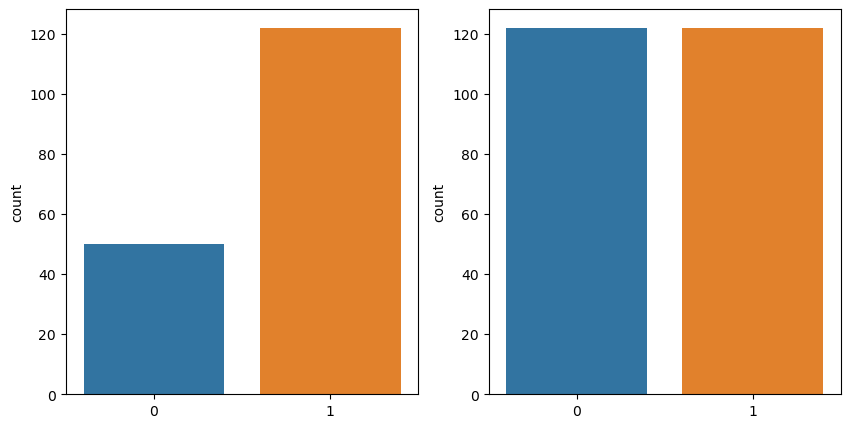

In [30]:
# plot the count plots side by side before and after resampling

# Your code goes here
print(len(x_train))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=y_train, ax=axes[0])
sns.countplot(x=y_train_sampled, ax=axes[1])

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**
**No**, we should not oversample the testing set. The purpose of oversampling, such as using SMOTE, is to address class imbalance in the training set and help the model learn from a more balanced representation of the classes. However, oversampling the testing set would introduce bias and invalidate the evaluation of the model's performance.

Here's why we should avoid oversampling the testing set:

1. **Reflecting Real-world Distribution**: The testing set should reflect the real-world distribution of classes to evaluate the model's generalization performance accurately. Oversampling the testing set would artificially alter this distribution and lead to inflated performance metrics that do not reflect the model's true performance on unseen data.

2. **Risk of Overfitting**: Oversampling the testing set could result in the model being overfitted to the oversampled minority class, leading to overly optimistic performance estimates. This would compromise the model's ability to generalize to new, unseen data.

3. **Unrealistic Scenario**: In real-world scenarios, we do not have control over the distribution of classes in the testing data. Therefore, oversampling the testing set would create an unrealistic scenario that does not align with the model's intended use.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [31]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline

In [32]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
pipeline = Pipeline([('smt', smt), ('svm', SVC())])

In [33]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold
stratifiedCV = StratifiedKFold(n_splits=5)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**
Stratified K-Folds cross-validation is super important because it ensures that when we're testing our machine learning models, we're doing it in a fair and representative way. Here's why it matters:

1. **Keeping Things Fair**: Imagine we're working with a dataset where one type of outcome is really rare. If we split our data randomly into folds for testing, there's a risk that some folds might not have any of those rare outcomes. Stratified K-Folds makes sure that each fold has a similar mix of outcomes, so we get a better idea of how our model performs across the board.

2. **Avoiding Biased Results**: Without stratification, we might end up with biased results. For example, if one fold happens to have a lot more of the rare outcomes by chance, our model might look like it's performing better than it actually is. Stratified K-Folds helps prevent this by balancing things out.

3. **Getting Realistic Estimates**: By mimicking the real-world distribution of outcomes in each fold, we get a more realistic estimate of how our model will perform when it encounters new, unseen data. This helps us trust our model's predictions and understand its strengths and weaknesses better.

In [34]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here

parameter_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]  # Include 'scale' and 'auto' for automatic tuning
}

In [35]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, parameter_grid , cv = 5);

In [36]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smt', SMOTE(random_state=3)),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'svm__kernel': ['linear', 'rbf']})

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [37]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
grid_search.best_score_ 

0.8546218487394958

In [38]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
grid_search.best_params_

{'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [39]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_model = grid_search.best_estimator_

### Model Evaluation

In [40]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_model.fit(x_train , y_train)

Pipeline(steps=[('smt', SMOTE(random_state=3)),
                ('svm', SVC(C=100, gamma=0.01))])

In [41]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
best_model.score(x_train , y_train)

0.9593023255813954

In [42]:
# Calculate the accuracy for the test set

# Your code goes here
best_model.score(x_test , y_test)

0.9069767441860465

**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:** Not Overfitting

The model's performance on both the training and test sets is quite high, with an accuracy of approximately 95.93% on the training set and 90.70% on the test set. While the training set accuracy is slightly higher than the test set accuracy, the difference between the two accuracies is not significant.

Typically, if a model is overfitting, we would expect to see a much higher accuracy on the training set compared to the test set. However, in this case, the difference between the training and test set accuracies is relatively small, suggesting that the model is **not significantly overfitting**.

Text(0.5, 58.7222222222222, 'Predicted')

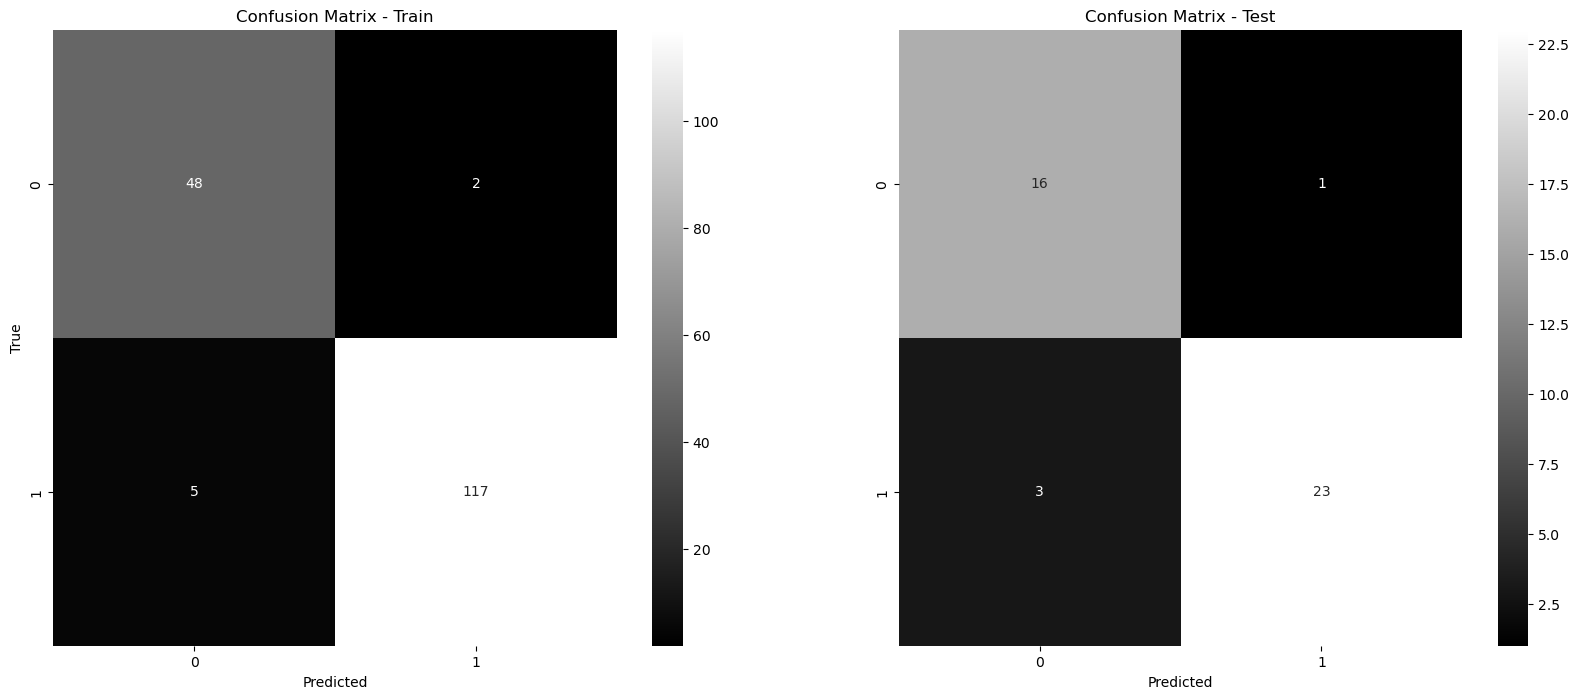

In [43]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
from sklearn.metrics import confusion_matrix


cm_train = confusion_matrix(y_train, best_model.predict(x_train))
cm_test = confusion_matrix(y_test, best_model.predict(x_test))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='gray', ax=ax1)
ax1.set_title('Confusion Matrix - Train')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='gray', ax=ax2)
ax2.set_title('Confusion Matrix - Test')
ax2.set_xlabel('Predicted')

**Q:** Comment about the obtained confusion matrices. <br>
> **A:**

**Training Set Confusion Matrix**

The high number of true positives (117) indicates that the model correctly predicted the "Placed" class for the majority of instances in the training set. The low number of false positives (2) suggests that the model made very few incorrect predictions of "Placed" when the actual class was "Not placed". Similarly, the low number of false negatives (5) indicates that the model made few incorrect predictions of "Not placed" when the actual class was "Placed". Overall, the model's performance on the training set appears to be quite strong.

**Test Set Confusion Matrix**

The test set confusion matrix shows similar patterns to the training set. The model correctly predicted the "Placed" class for a majority of instances (23 true positives) and made very few incorrect predictions of "Placed" (1 false positive) or "Not placed" (3 false negatives). The number of true negatives (16) indicates correct predictions of "Not placed". Overall, the model's performance on the test set is also quite strong, although there are slightly more false negatives and false positives compared to the training set.

**In summary, both confusion matrices suggest that the model is performing well**, with high accuracy and relatively few misclassifications on both the training and test sets.







In [44]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report

y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.96      0.88      0.92        26

    accuracy                           0.91        43
   macro avg       0.90      0.91      0.90        43
weighted avg       0.91      0.91      0.91        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**

1. **Precision** Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. In this report, the precision for class 0 (Not placed) is 0.84, indicating that 84% of the instances predicted as "Not placed" were actually "Not placed". For class 1 (Placed), the precision is 0.96, indicating that 96% of the instances predicted as "Placed" were actually "Placed".

2. **Recall (Sensitivity)** Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. In this report, the recall for class 0 is 0.94, indicating that 94% of the actual "Not placed" instances were correctly predicted as "Not placed". For class 1, the recall is 0.88, indicating that 88% of the actual "Placed" instances were correctly predicted as "Placed".

3. **F1-score** The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. It is particularly useful when the class distribution is imbalanced. In this report, the F1-score for class 0 is 0.89, and for class 1, it is 0.92.

4. **Support** Support represents the number of actual occurrences of each class in the test set. In this report, there are 17 instances of class 0 and 26 instances of class 1.

5. **Accuracy** Accuracy measures the overall correctness of the model's predictions, calculated as the ratio of correctly predicted instances to the total number of instances. In this report, the overall accuracy is 0.91, indicating that the model correctly predicted 91% of the instances in the test set.

0.9128959276018099


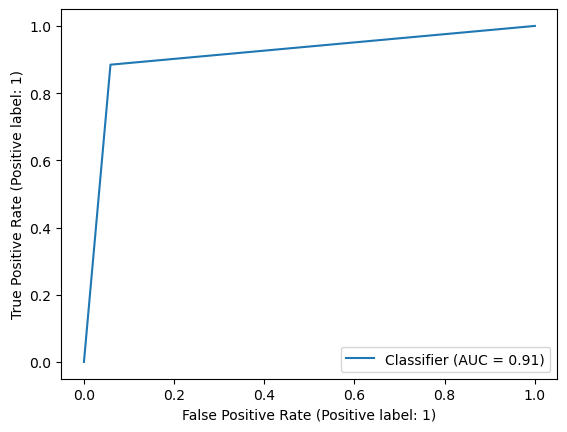

In [45]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import  RocCurveDisplay

fig = RocCurveDisplay.from_predictions(y_test , y_pred)

print(fig.roc_auc)

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**

>The ROC curve and AUC (Area Under the Curve) value are evaluation metrics for binary classification models.

>The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.

>TPR represents the proportion of actual positive cases correctly classified as positive, while FPR represents the proportion of actual negative cases incorrectly classified as positive.

>AUC summarizes the ROC curve's performance, with a value close to 1 indicating excellent discrimination and 0.5 suggesting random guessing.

>The ROC curve's positioning near the upper left corner and the AUC value of 0.91 in this case indicate strong classifier performance.

>This suggests the model effectively identifies positive instances with high accuracy while minimizing false positives.